# Summary Statistics Plots

In [1]:
import os
homepath = os.path.join(os.path.expanduser("~"), 'dev/data-portal-summary-stats')
os.chdir(homepath)
import scanpy as sc
import numpy as np

## Create a `ScanPy` data object

In [2]:
sc.settings.set_figure_params(dpi=200)  # figure resolution

In [3]:
mtxfile = 'notebook/mtxfile_processed.mtx/'
adata = sc.read_10x_mtx(mtxfile, # the directory with the `.mtx` file
        var_names='gene_symbols',    # use gene symbols for variable names (variables-axis index)
        cache=True)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Highest-variable genes

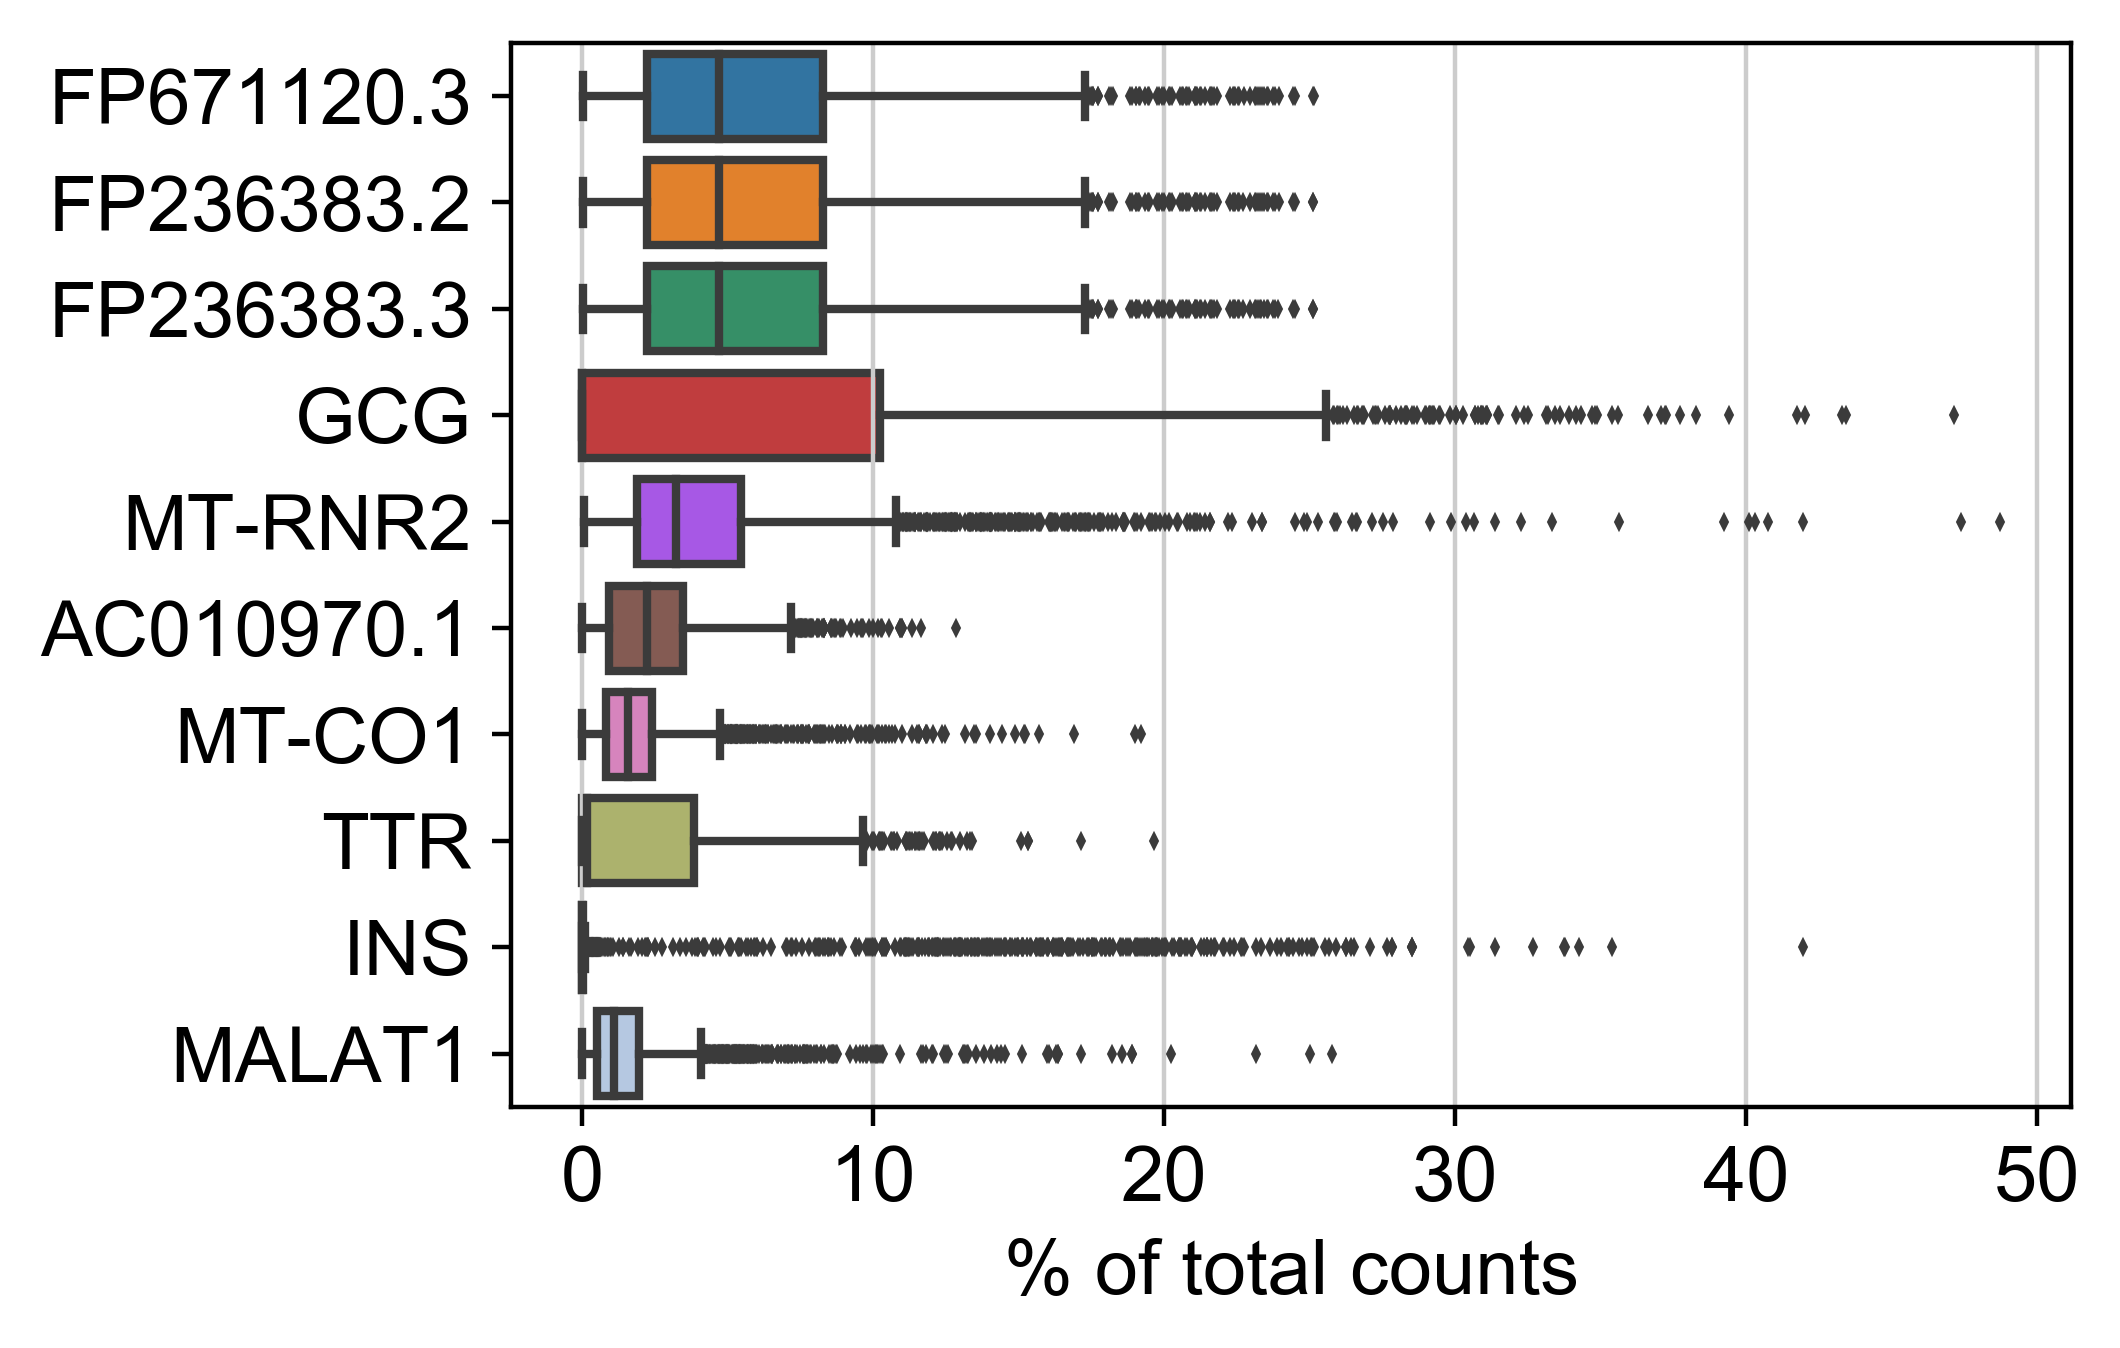

In [4]:
sc.pl.highest_expr_genes(adata, n_top=10)

In [5]:
sc.pp.filter_cells(adata, min_genes=1200)
sc.pp.filter_genes(adata, min_cells=10)

In [6]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

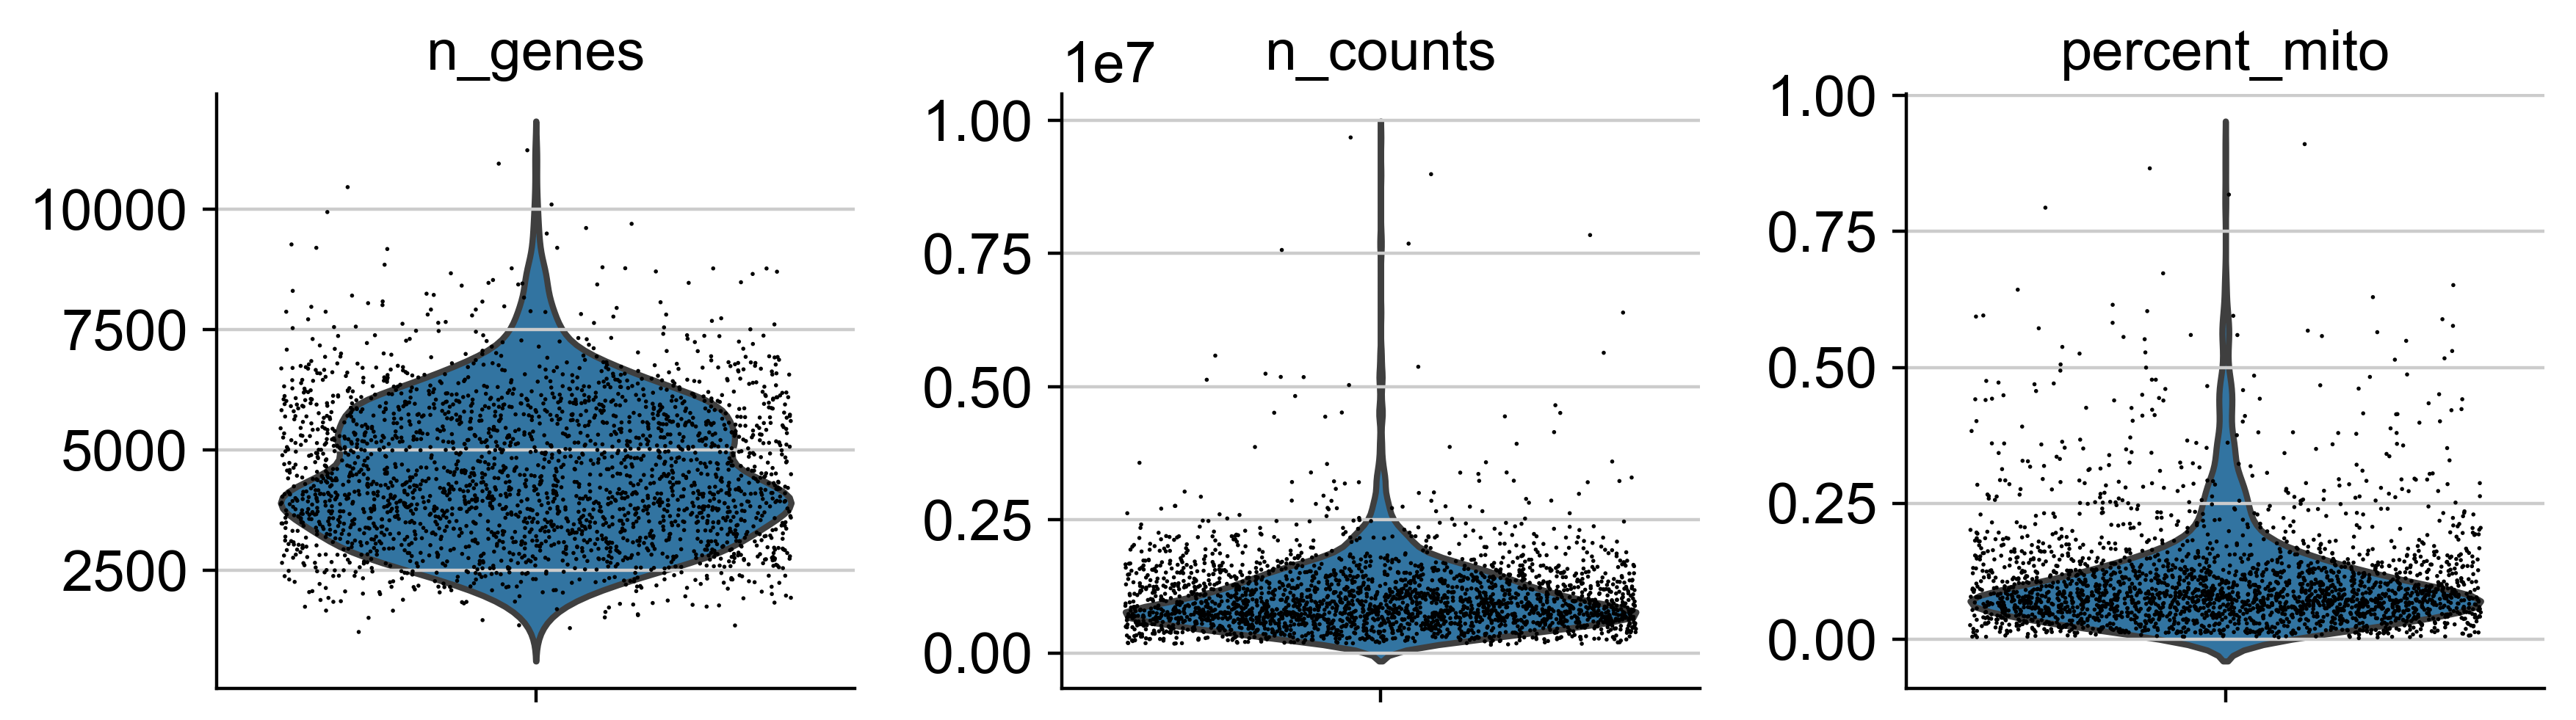

In [7]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

Violin plots are similar to box plots, but in addition show the probability density, smoothed by a kernel density estimator.
* `n_genes` represents number of genes for each cell. That is, not every gene is expressed in each cell and some cells express more genes than others.
* `n_counts` represents the total number of counts for each cell.
* `percent_mito` represents the fraction of mitochondrial genes of the total number of genes, for each cell.

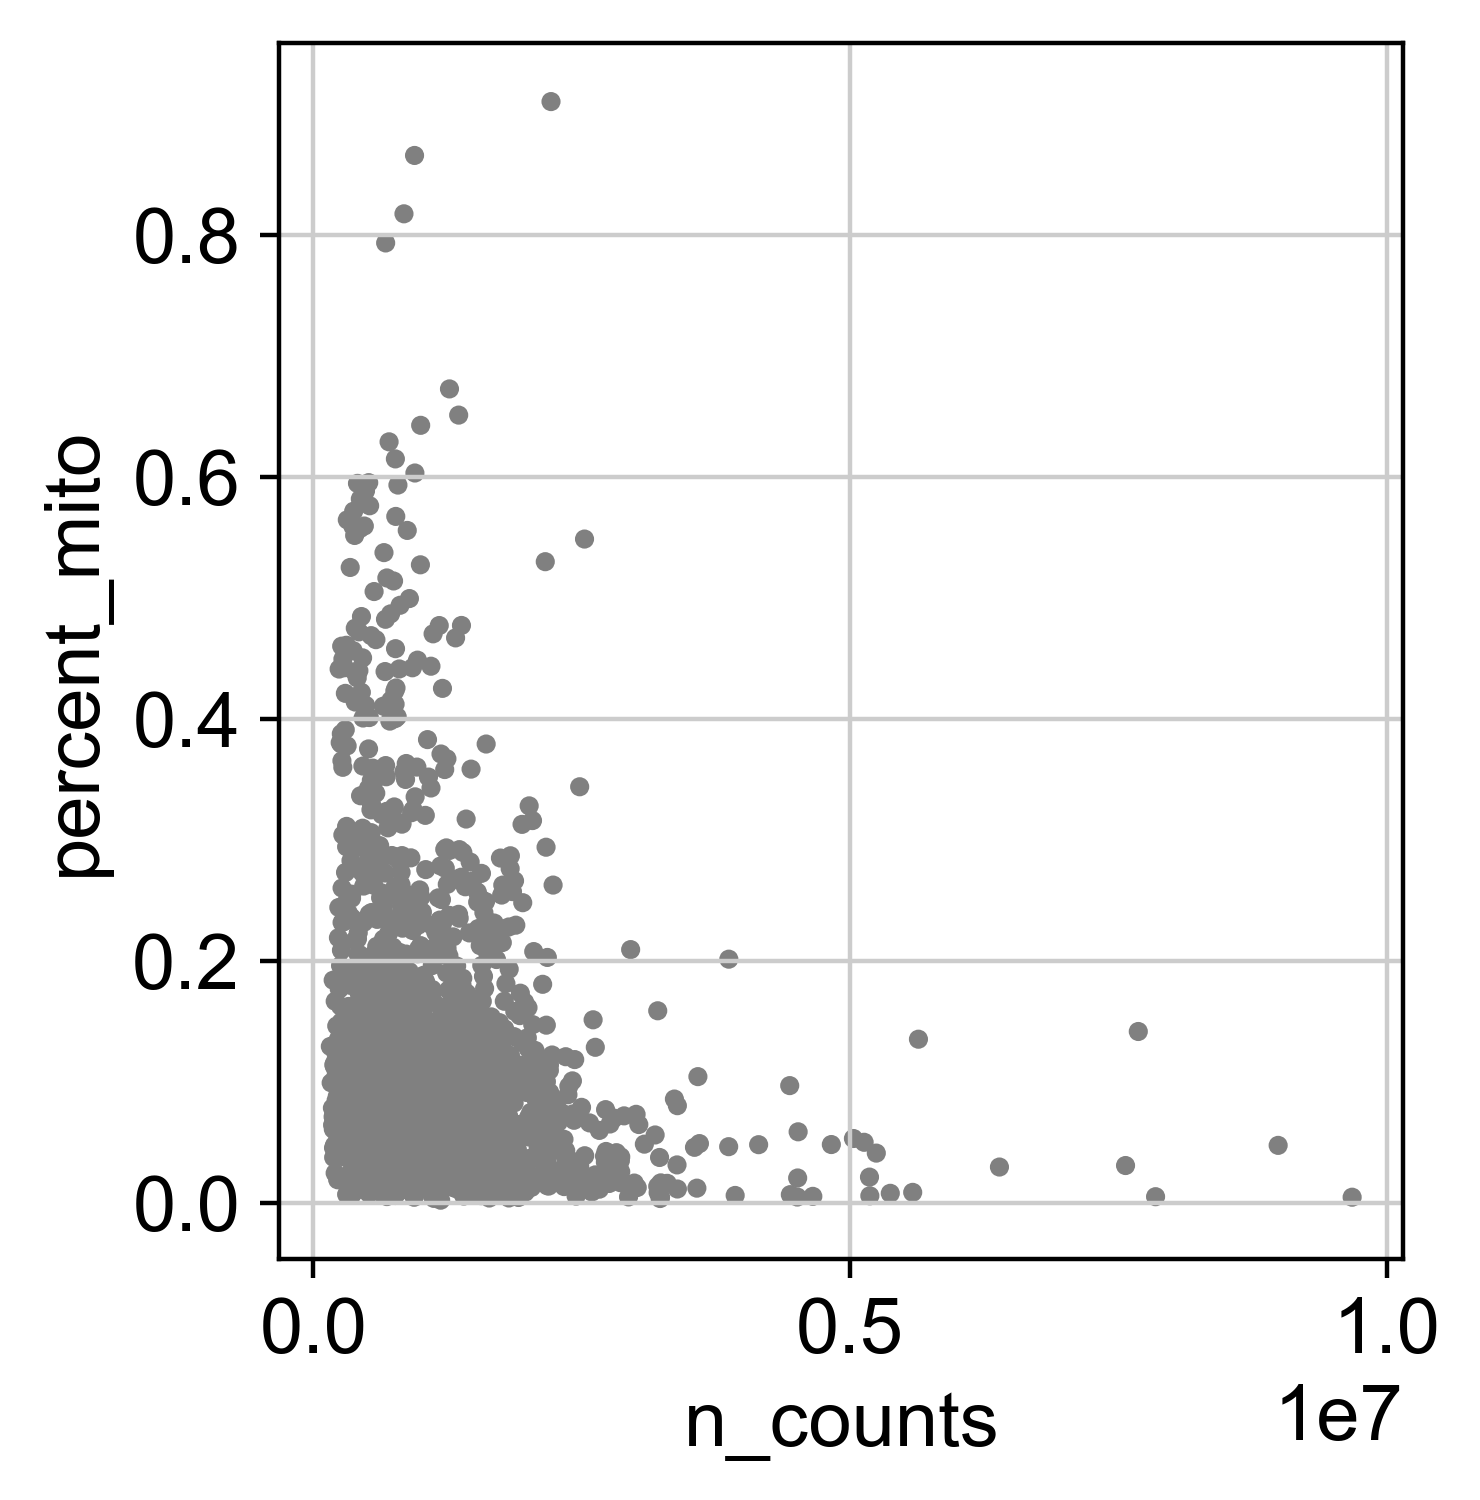

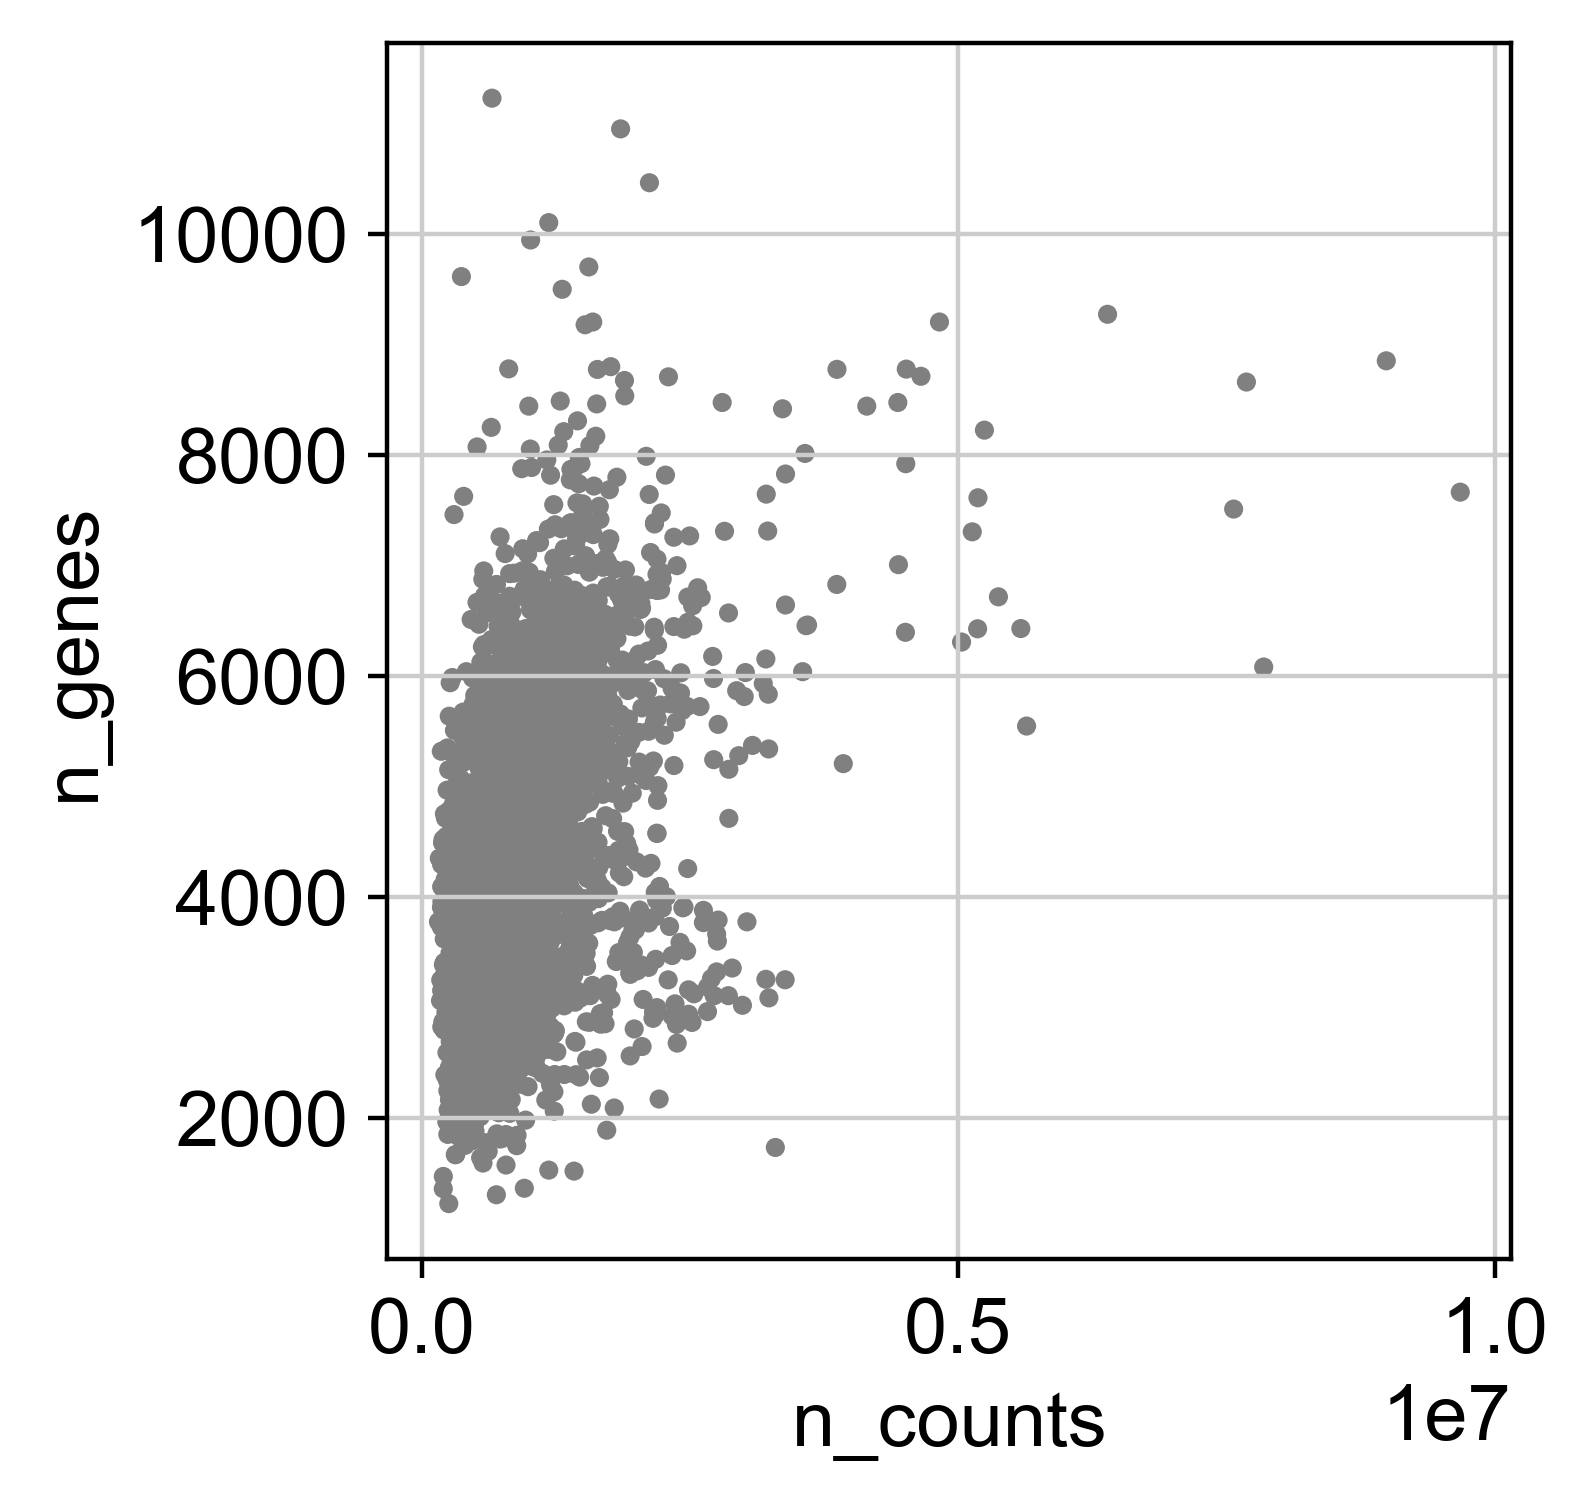

In [8]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

## Identify highly variable genes.

In [9]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)  # logarithmize
adata.raw = adata   # save raw data for later use

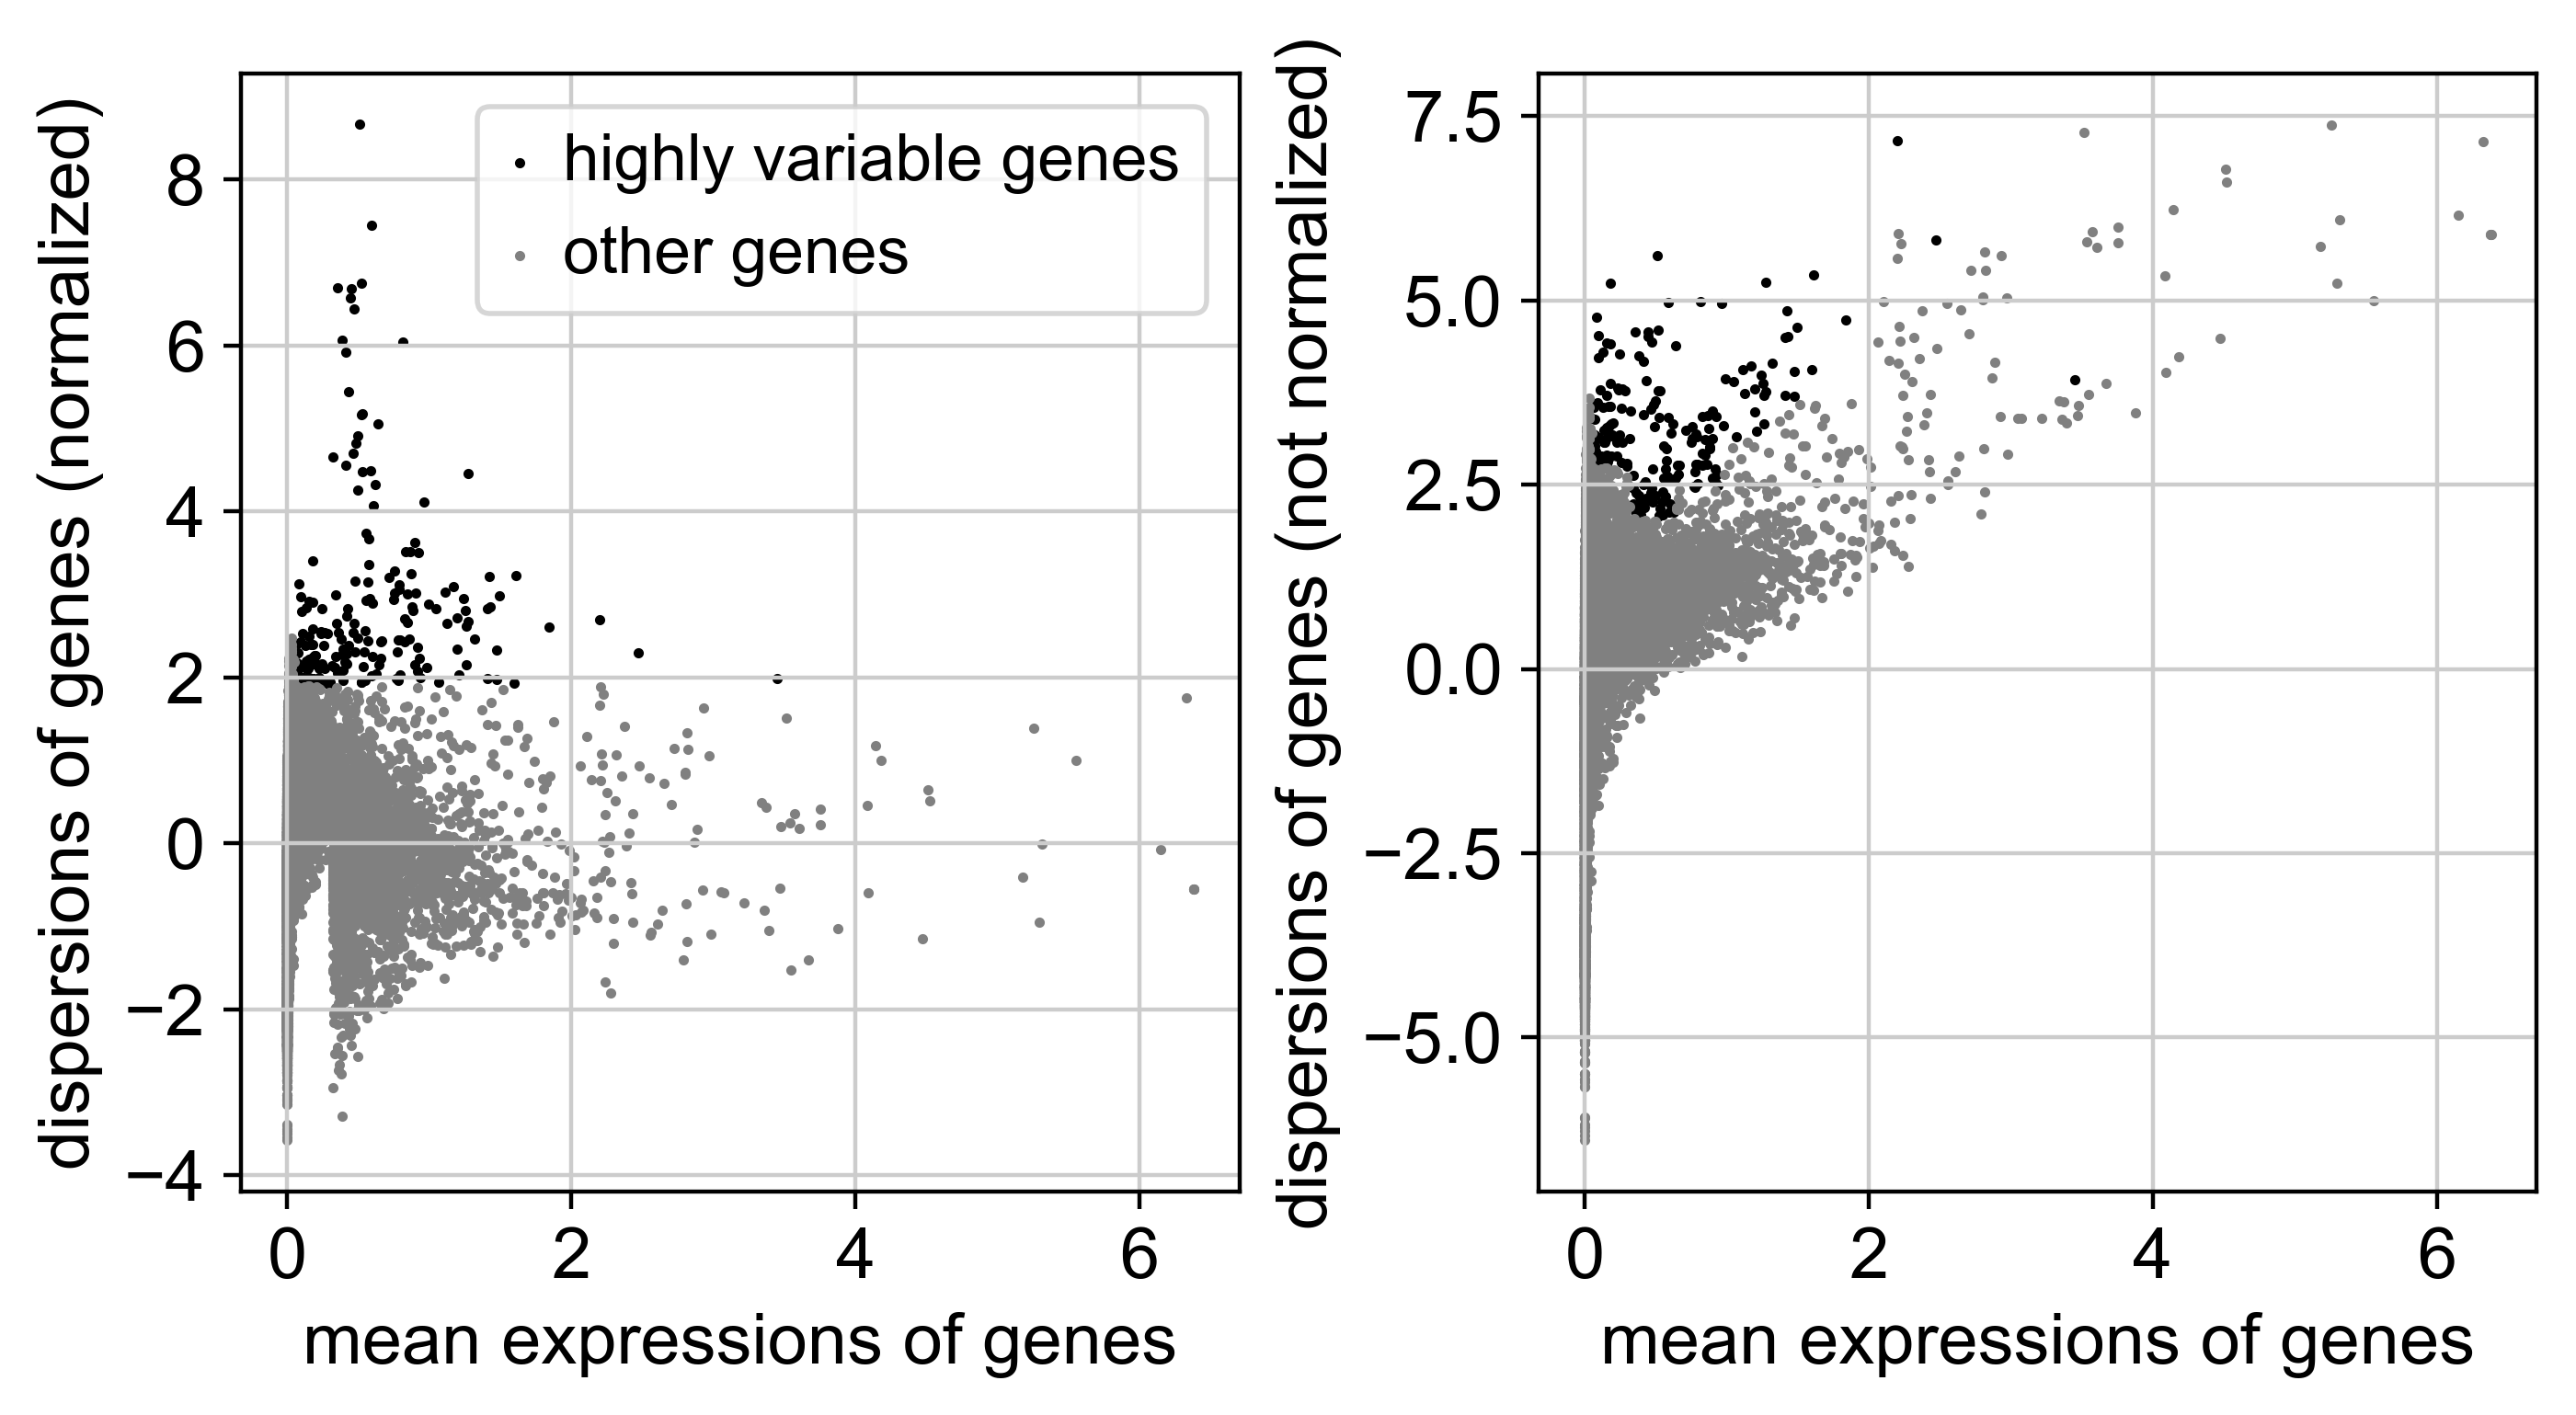

In [10]:
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=30, min_disp=1.9)
sc.pl.highly_variable_genes(adata)

## Principal Component Analysis

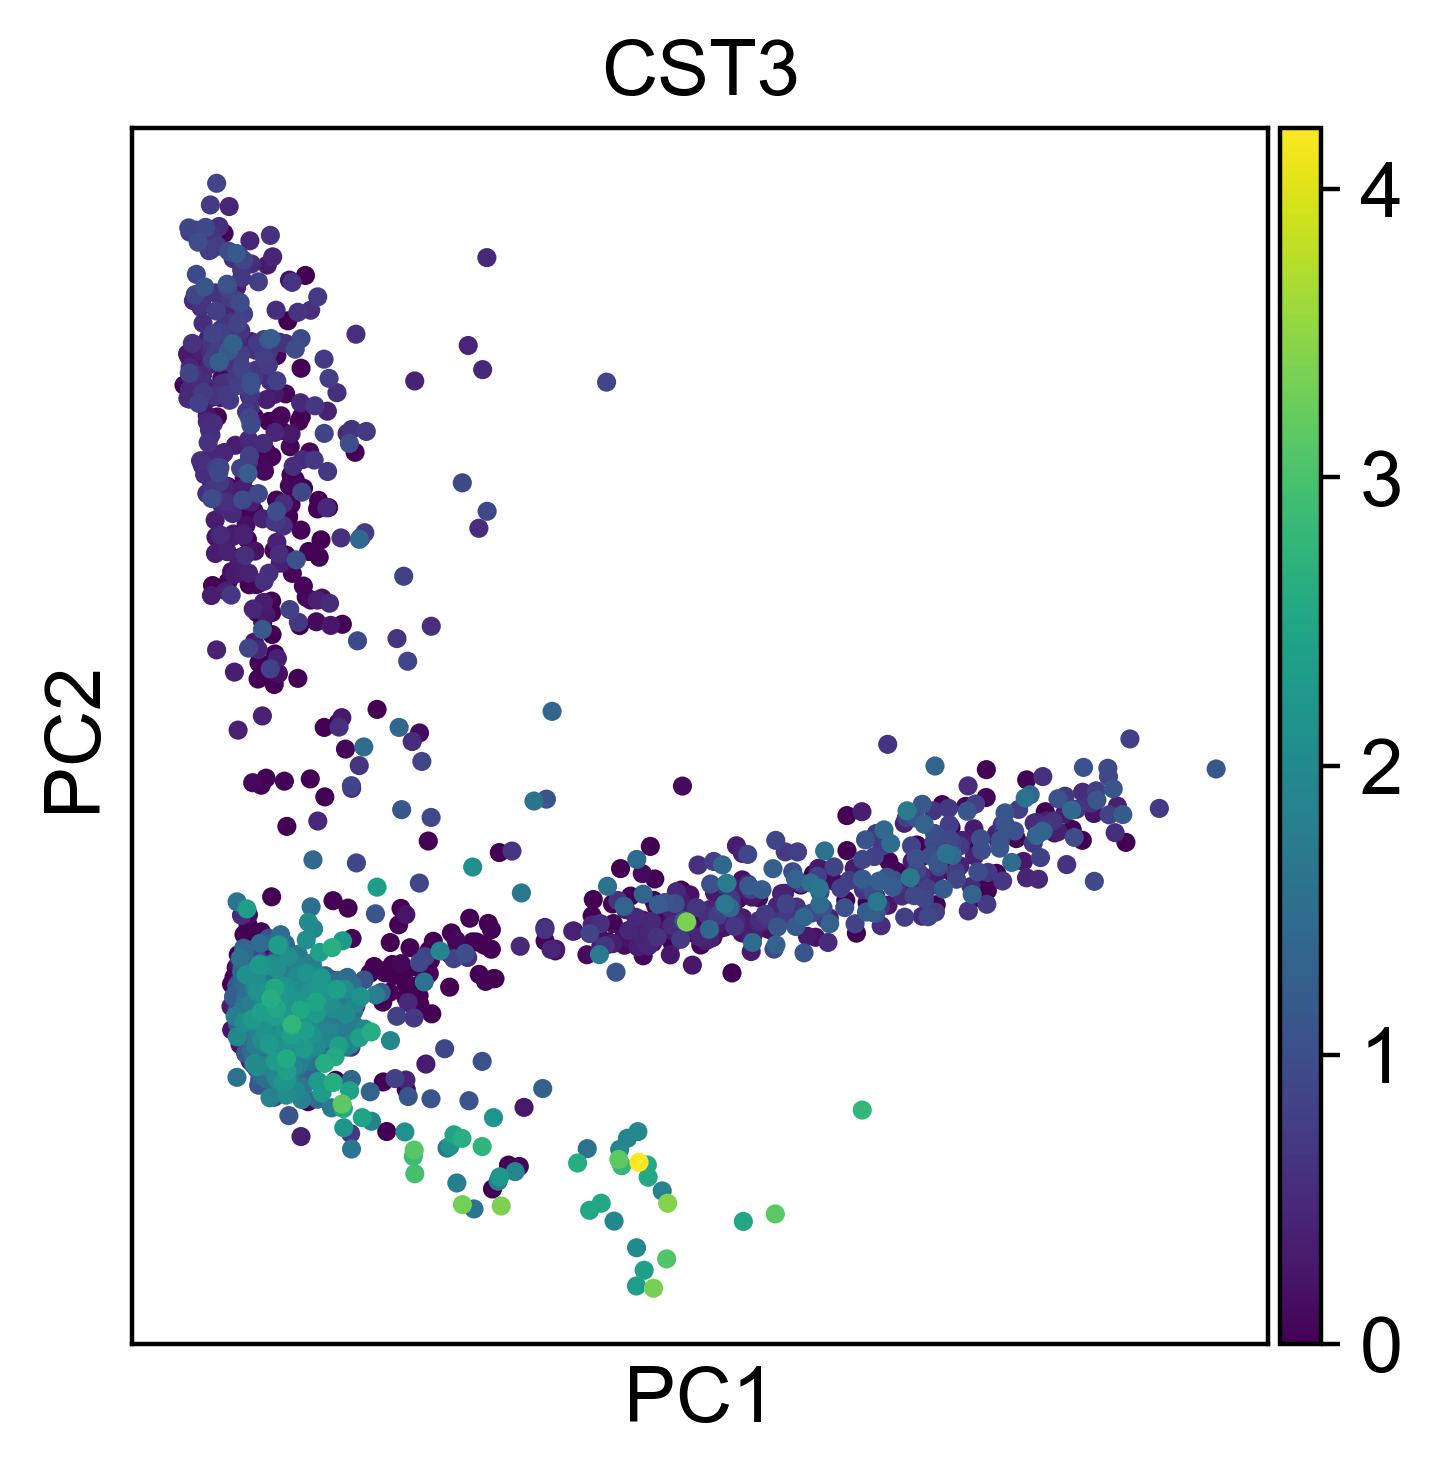

In [11]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')

## tSNE

/home/michael/dev/data-portal-summary-stats/.venv/lib/python3.6/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File ".venv/lib/python3.6/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/michael/dev/data-portal-summary-stats/.venv/lib/python3.6/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File ".venv/lib/python3.6/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/michael/dev/data-portal-summary-stats/.venv/lib/python3.6/site-packages/numba/comp

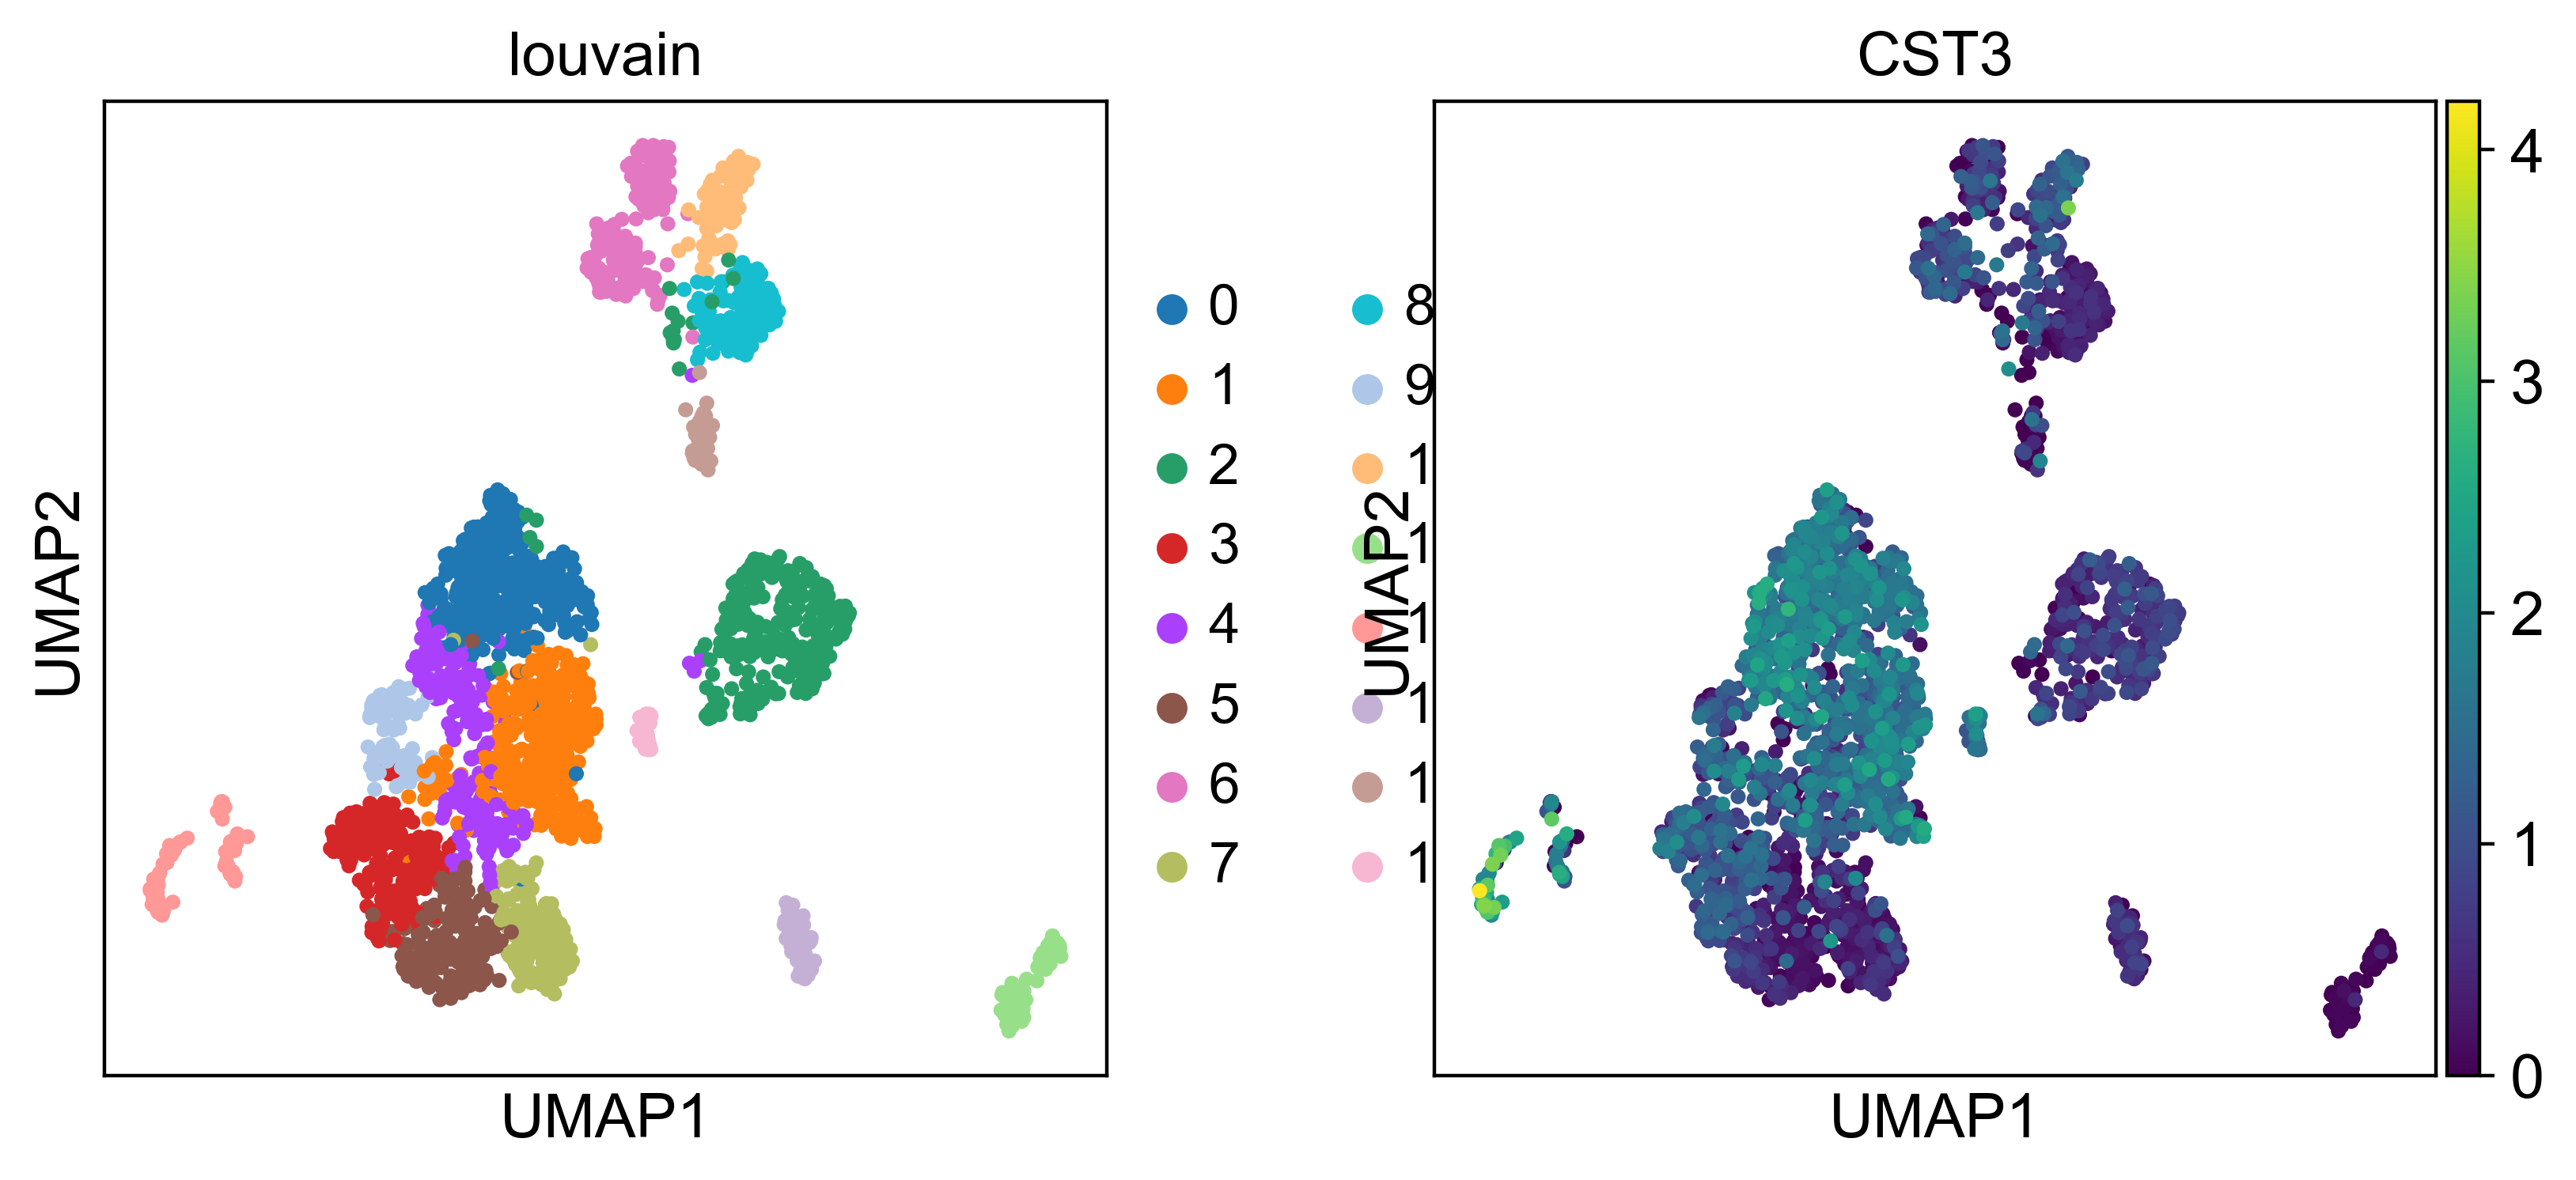

In [12]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.louvain(adata)
sc.pl.umap(adata, color=['louvain', 'CST3'])

/home/michael/dev/data-portal-summary-stats/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/michael/dev/data-portal-summary-stats/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


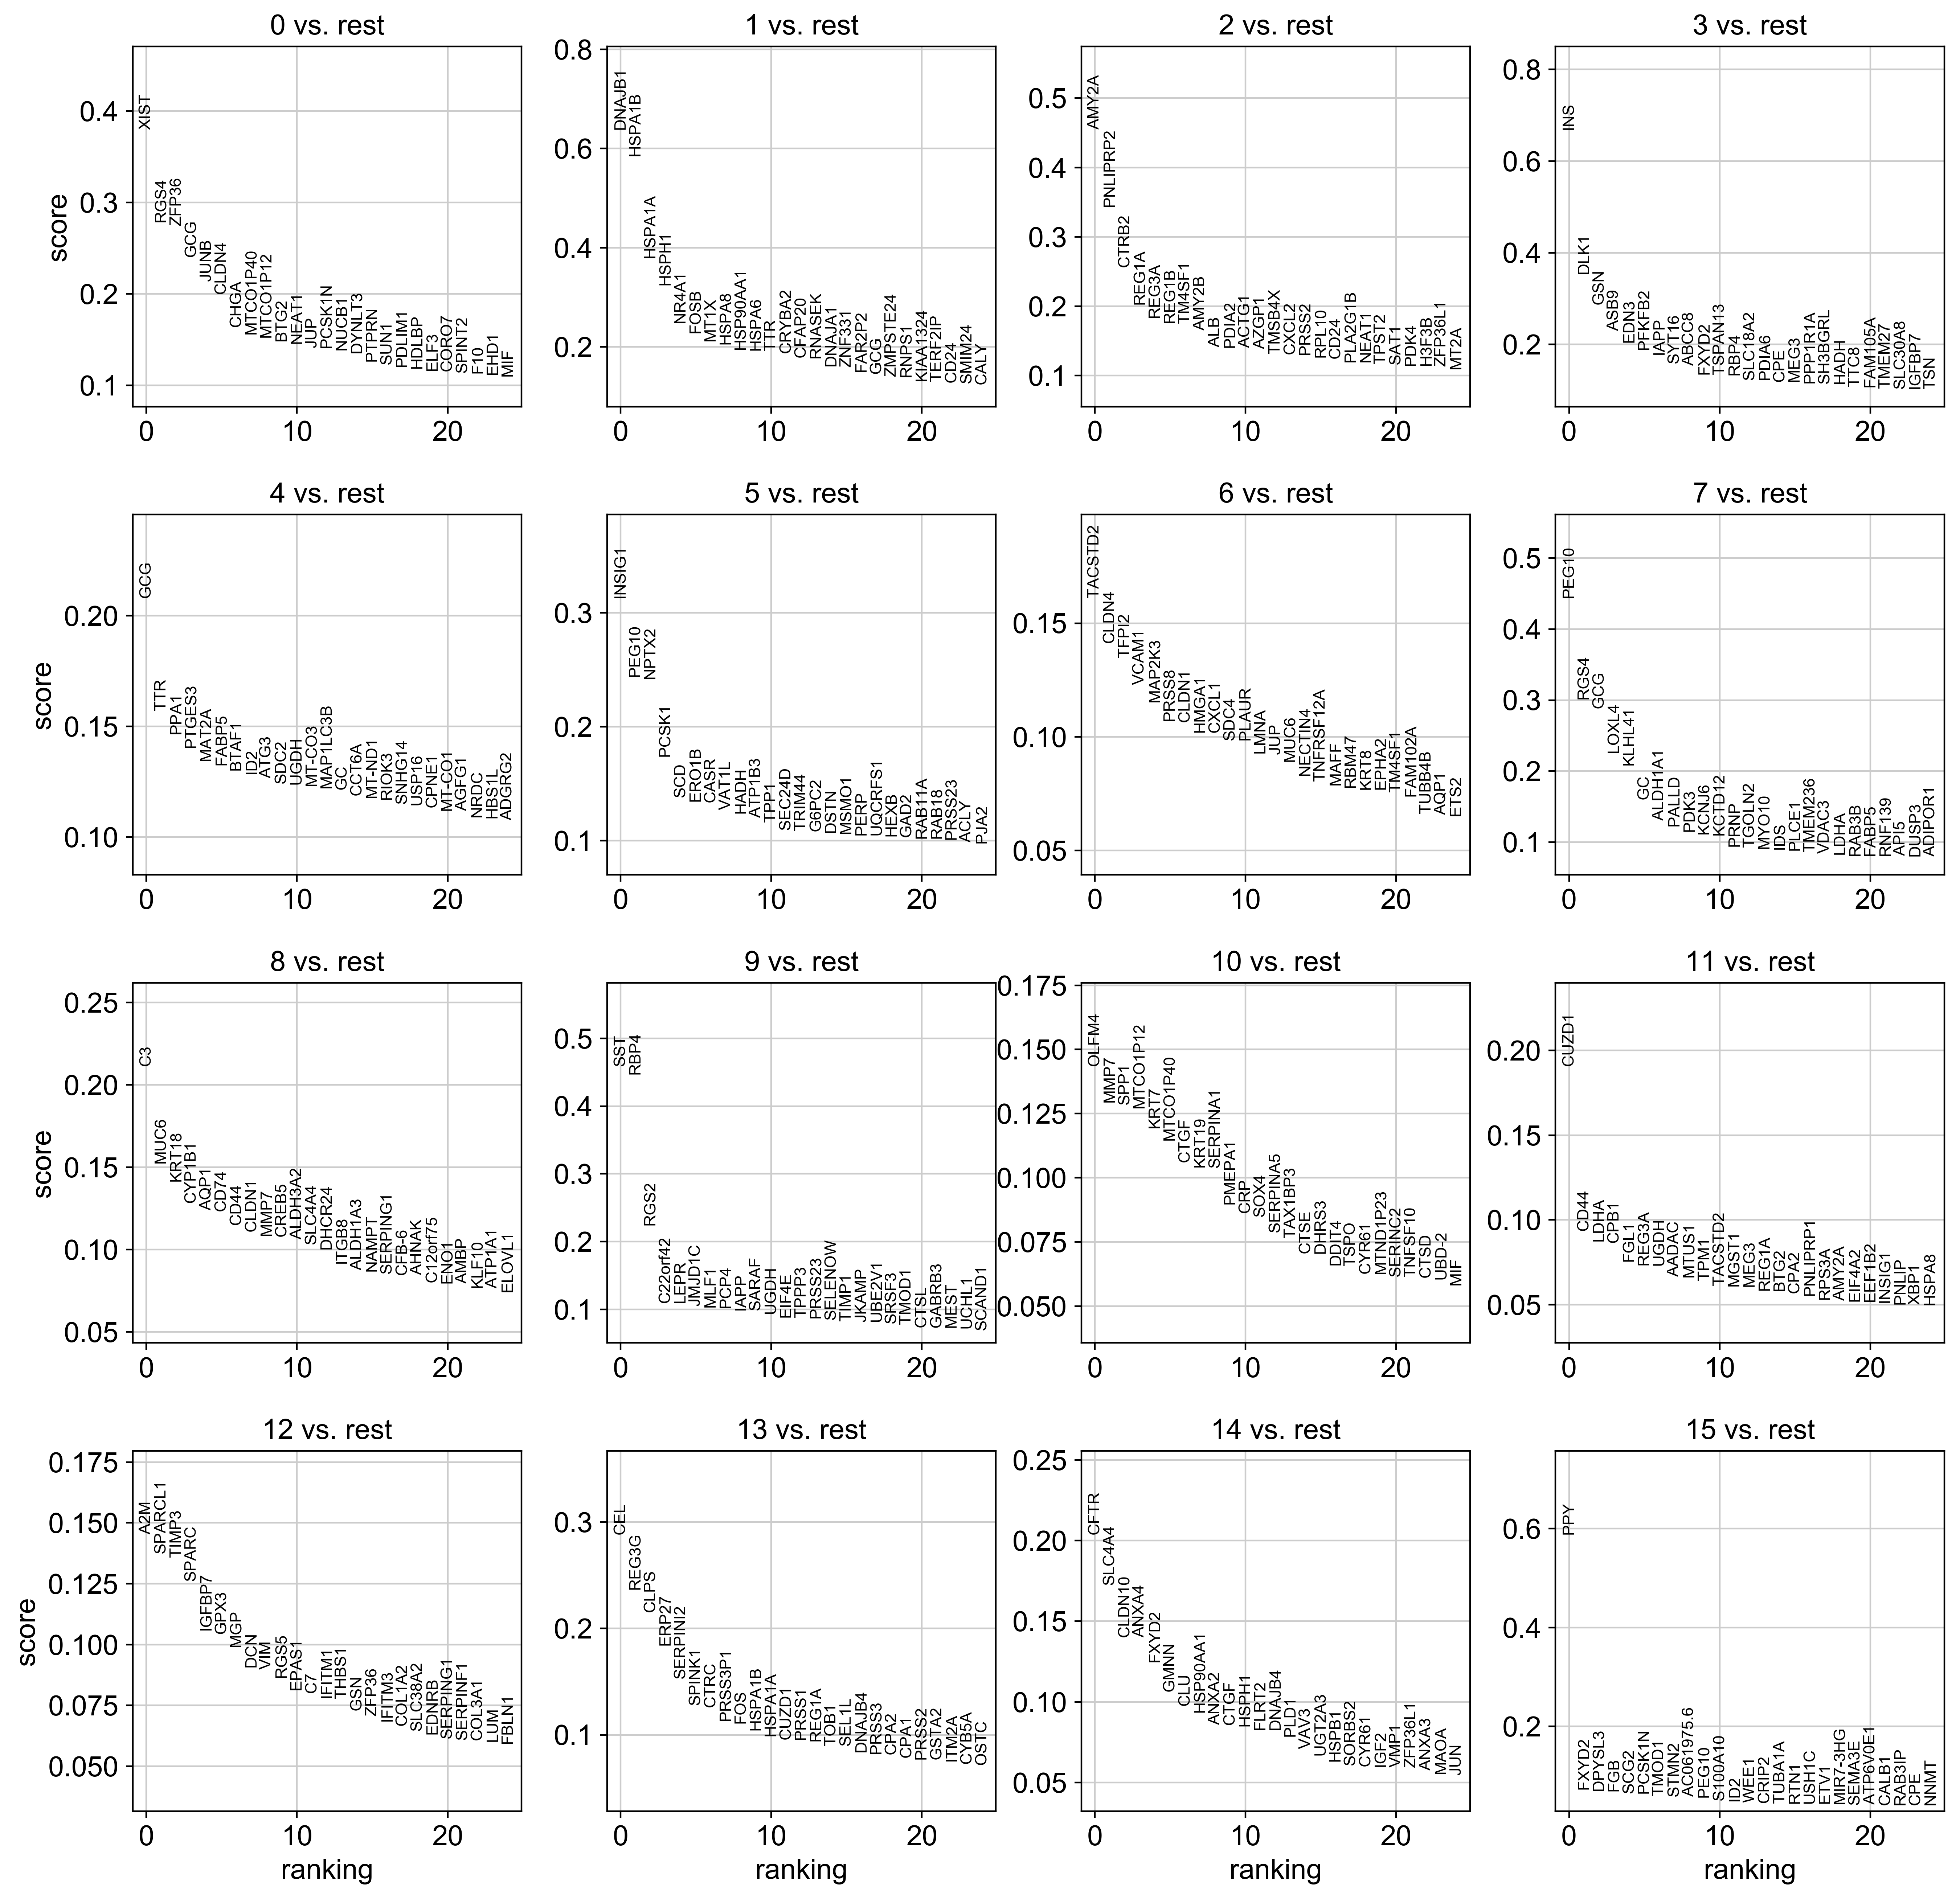

In [14]:
sc.tl.rank_genes_groups(adata, 'louvain', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)